<a href="https://colab.research.google.com/github/Fhayes3/ds-projects/blob/main/Fred_Hayes_DSBA_Project_ET_EasyVisa_Fullcode_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

In [ ]:
#Loading dataset
visa =pd.read_csv("EasyVisa.csv")
ds = visa.copy()

## Data Overview

- Observations
- Sanity checks

**Below are the first five and last five rows of the Data set.**

In [ ]:
ds.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
ds.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


**The Shape of the data set**

In [ ]:
ds.shape

(25480, 12)

The data set contains 25480 rows and 12 columns.

**Test for duplicated values**

In [ ]:
ds.duplicated().sum()

0

There are no duplicated values.

**Dropping Case Id from the data set since it will not be useful to us.**

In [ ]:
ds.drop("case_id", axis=1, inplace=True)
ds.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


Above, you can see that the case id has been removed from the data set.

In [ ]:
ds.shape

(25480, 11)

We can also see that the shape of the data set has changed and that there are only 11 columns now.

**Checking general info about the remaining data set.**

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


There are only three numerical columns in the data set. The rest are objects.

**Checking for null values in the data set.**

In [ ]:
ds.isna().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

There are no null values in the data set.

**Checking the description of the data set.**

In [ ]:
ds.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


With only three numerical columns there is not a lot to explore here but one data point that will need to be explored is the negative minimum in the Number of Employees column.

**Checking the number of rows in the Number of Employees column with a negative result.**

In [ ]:
(ds.no_of_employees < 0).sum()

33

There are 33 rows with a negative result.

**Since the number is as low as it is, we will convert the negatives to positives by applying their absolute value in the code below.**

In [ ]:
ds['no_of_employees'] = np.abs(ds['no_of_employees'])

**Now we will run the check for negative values again to confirm our success.**

In [ ]:
(ds.no_of_employees < 0).sum()

0

There are now zero negative values in the Number of Employees column.

**We will now run some code to describe the Number of Employees column by itself.**

In [ ]:
ds.no_of_employees.describe()

count     25480.000000
mean       5667.089207
std       22877.917453
min          11.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64

The new minimum value is 11.

**Now we can run a check on the rest of data to describe our object variables.**

In [ ]:
#Code to display a summary of object variables
ds.describe(include=['object']).T

,count,unique,top,freq
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


From this we can see that Asia is the most popular continent to apply from. A Bachelor's degree is the most common level of education. Most applicants have job experience and will require no training. A vast majority are applying for a yearly salary via a full time position. The Northeast is the most likely region they will work in and a large percentage of them will get their visas certified.

**Converting Object variables to Categorical to save space and make them easier to work with.**

In [ ]:
cols = ds.select_dtypes(['object'])
cols.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
for i in cols.columns:
    ds[i] = ds[i].astype('category')

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


We can see above that all of our Object variables have been successfully converted to Categorical.

In [ ]:
ds.describe(include=['category'])

,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480,25480,25480,25480
unique,6,4,2,2,5,4,2,2
top,Asia,Bachelor's,Y,N,Northeast,Year,Y,Certified
freq,16861,10234,14802,22525,7195,22962,22773,17018


We can also see that this change has had effects on the data itself.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Code for Visual Analysis

In [ ]:
#Code to create a display featuring both a boxplot and a histogram 
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

    ### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

**Continent**

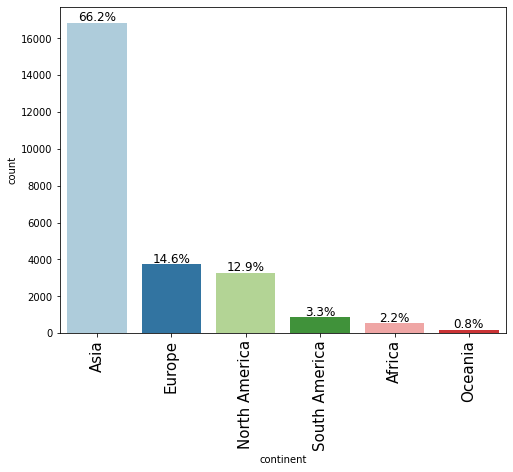

In [ ]:
labeled_barplot(ds, "continent", perc=True,)

By far the greatest number of applicants come from Asia at 66.2%. Europe and North America are both in the 15 - 13% range with South America, Africa, and Oceania being near afterthoughts at 3.3%, 2.2%, ad .8% respectively.

**Education of Employee**

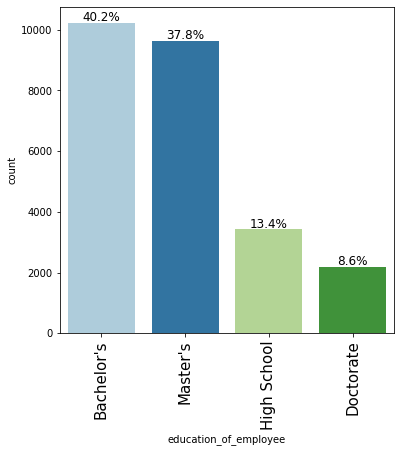

In [ ]:
labeled_barplot(ds, "education_of_employee", perc=True,)

Bachelor's and Master's degrees come in pretty even as one might expect given the popularity and availability of these degrees. After those two there is a sharp drop off to High School and Doctorate level education. The amount of Doctorate level applicants makes sense given the difficulty of securing that level of education. It is interesting to see that so many with only a High School education would apply for the visa program.

**Has Job Experience**

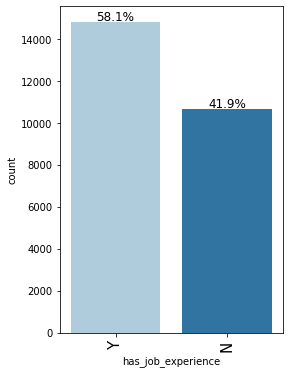

In [ ]:
labeled_barplot(ds, "has_job_experience", perc=True,)

Almost 60% of job applicants have relevant job experience.

**Requires Job Training**

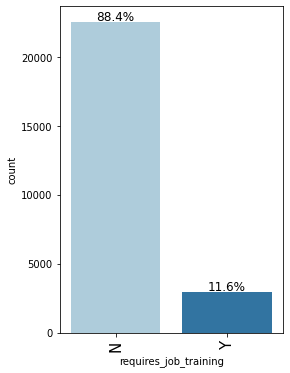

In [ ]:
labeled_barplot(ds, "requires_job_training", perc=True,)

A little more than 88% of applicants will not require job training. This is interesting given the graph above that indicates only 58.1% of applicants have previous experience. 

**Number of Employees**

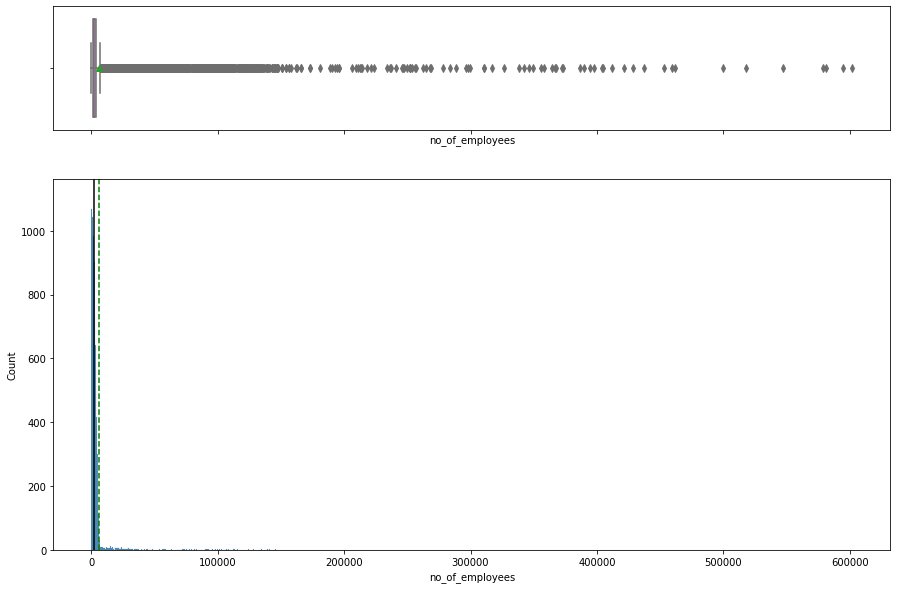

In [ ]:
histogram_boxplot(ds, "no_of_employees")

The data here shows that the program is being engage mostly by smaller companies and businesses. This could make sense given that there are many more small businesses than larger ones. Also, larger companies tend to have correspondingly larger global footprints and may be able to hire applicants in their native countries without bringing them to the U.S. via the visa process.

**Year of Establishment**

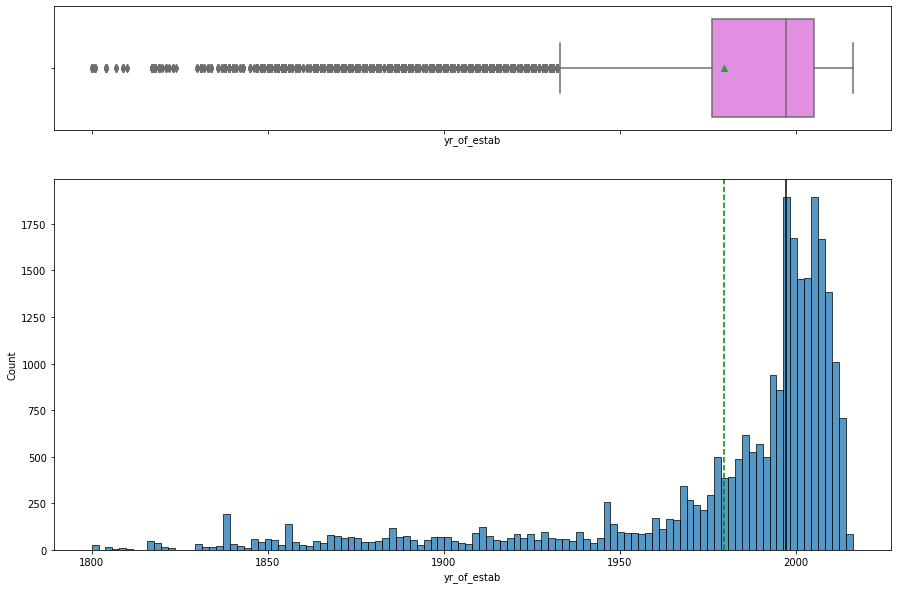

In [ ]:
histogram_boxplot(ds, "yr_of_estab")

I am not entirely certain how generally relevant this data point is but we can see her that the median is somewhere in the mid 1990's. Which would put them right around the beginning of the Information Age. The newer companies could very well be tech-based.

**Region of Employment**

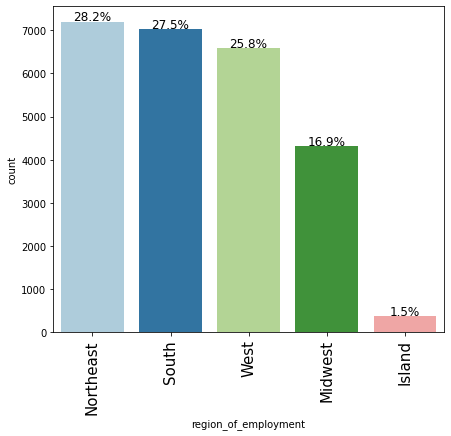

In [ ]:
labeled_barplot(ds, "region_of_employment", perc=True,)

This statistic makes for a sad bit of logical sense. The Northeast, South, and West regions of the U.S. are all doing well economically whereas the Midwest region, also known as the Rustbelt, has only a few truly prosperous cities. Island being as low as it is makes sense considering how few of them there are in the U.S. and how few companies are headquartered on them.

**Prevailing Wage**

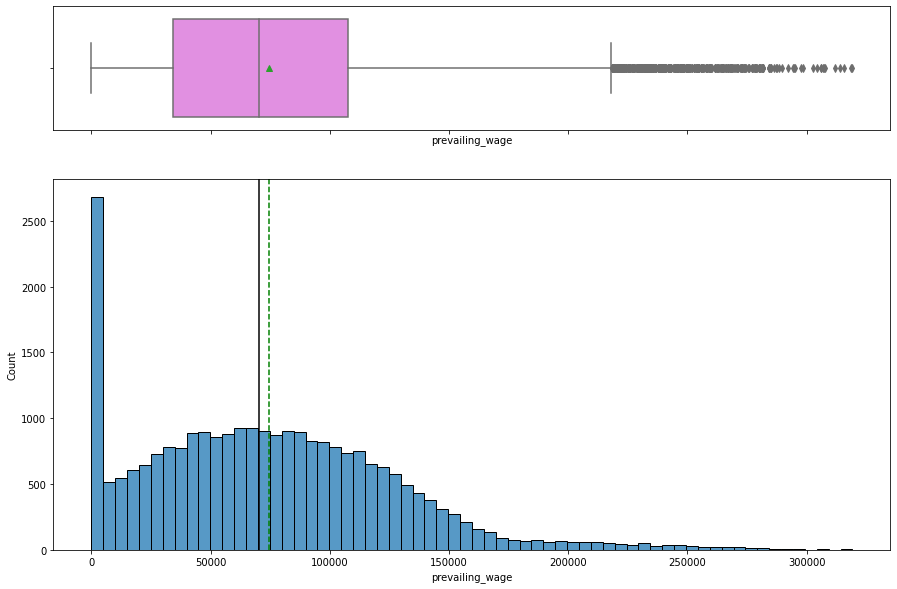

In [ ]:
histogram_boxplot(ds, "prevailing_wage")

In [ ]:
#ds[ds["prevailing_wage"] < 100] ["unit_of_wage"].count()
ds.loc[ds['prevailing_wage']<100]
#ds.loc[data['Landsize']>60000]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


In [ ]:
ds.loc[ds["prevailing_wage"] < 100, "unit_of_wage"].count()

176

There are 176 entries with Prevailing Wage below $100 and they all fall under the Hourly Unit of Wage which makes perfect sense and is acceptable.

**Unit of Wage**

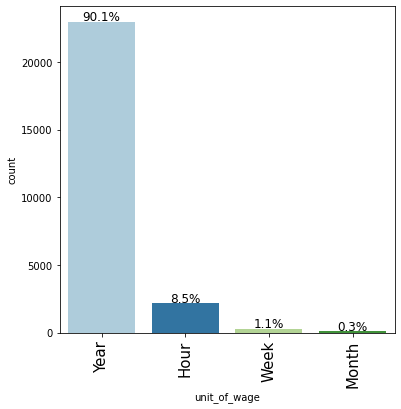

In [ ]:
labeled_barplot(ds, "unit_of_wage", perc=True,)

**Full Time Position**

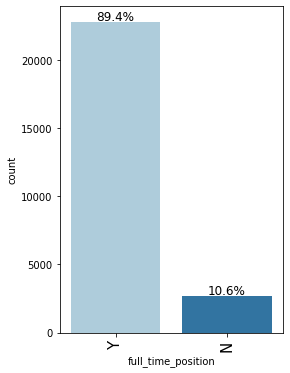

In [ ]:
labeled_barplot(ds, "full_time_position", perc=True,)

This is hardly surprising as most companies willing to hire someone via the visa program would be looking to bring them on full-time to justify the investment. I would hazard a guess that most of the 10.6% in the No column are not part-time but term contract work.

**Case Status**

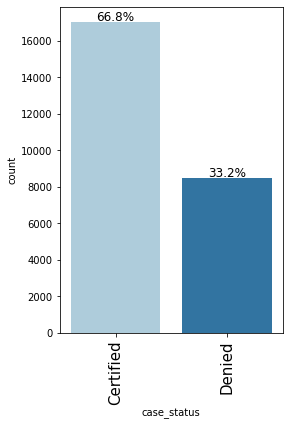

In [ ]:
labeled_barplot(ds, "case_status", perc=True,)

Our final data point for univariate analysis (and the one we are looking to study most closely in this model) is case status or certification rate. Currently, we see that about two thirds of applicants end up getting certified. 

### Bivariate Analysis

**Heat map of the Numerical Variables with Yes/No answers converted to 1's and 0's**

<Figure size 720x360 with 0 Axes>

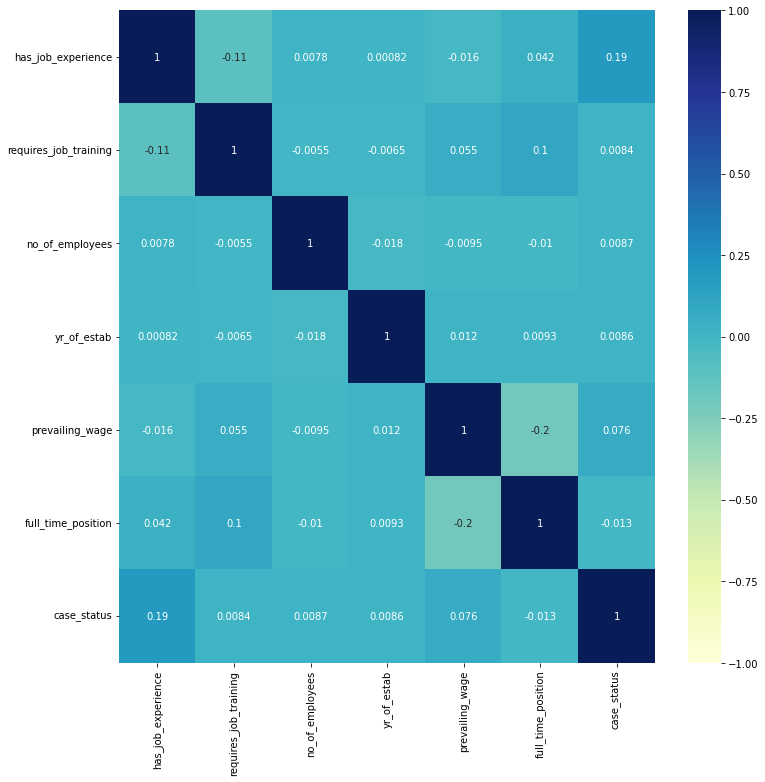

In [ ]:
plt.figure(figsize=(10,5))
ds_gconvert = ds
ds_gconvert = ds_gconvert.replace({'full_time_position': {'Y': 1, 'N': 0}})
ds_gconvert = ds_gconvert.replace({'requires_job_training': {'Y': 1, 'N': 0}})
ds_gconvert = ds_gconvert.replace({'has_job_experience': {'Y': 1, 'N': 0}})
ds_gconvert = ds_gconvert.replace({'case_status': {'Certified': 1, 'Denied': 0}})
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(data=ds_gconvert.corr(), annot=True,  cmap='YlGnBu',vmin=-1,vmax=1);

Even with the added dimensions of additional converted data points there seems to be little in the way of connection. The strongest connection in the heat map is the relationship between job experience and case status at .19. The lowest appears to be the relationship between Full-time and Prevailing Wage at -.2.

**Relation between Level of Education and Region of Employment**

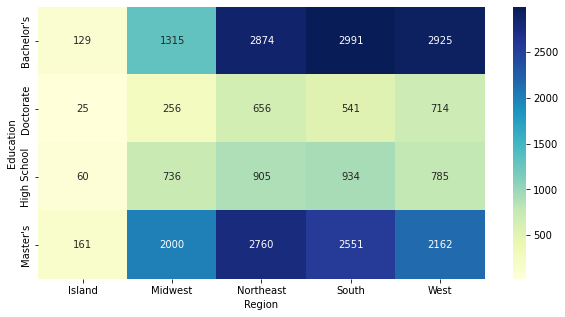

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab([ds.education_of_employee], [ds.region_of_employment ]),
            cmap="YlGnBu", annot=True,   fmt="g")
plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

The relationship here between the Northeast, South, and West regions to Bachelor's degrees is the strongest in the map with Master's degrees also being very popular in those regions as well. The Island region seems almost irrelevant to all levels of education due to limited counts. The Midwest seems to have similar relationships to level of education as the other main regions, just far fewer opportunites.

**Region of Employment and Case Status**

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


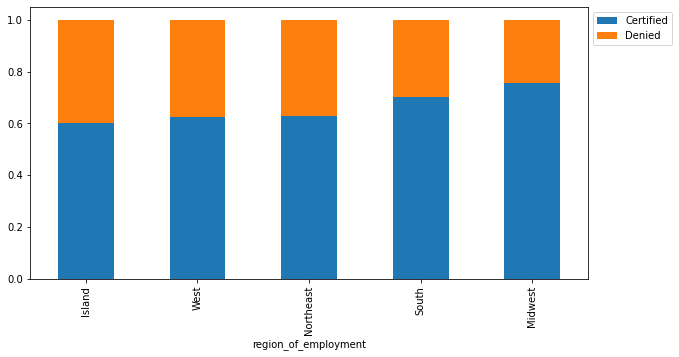

In [ ]:
stacked_barplot(ds, "region_of_employment", "case_status")

The Island, West, and Northeast regions are all roughly the same with a slight rise in the South region and another small jump in the Midwest. Qualified candidates may be harder to come by in these regions necessitating engaging in a broader search for qualified talent.

**Work Experience and Job Training**

has_job_experience         N      Y    All
requires_job_training                     
All                    10678  14802  25480
N                       8988  13537  22525
Y                       1690   1265   2955
------------------------------------------------------------------------------------------------------------------------


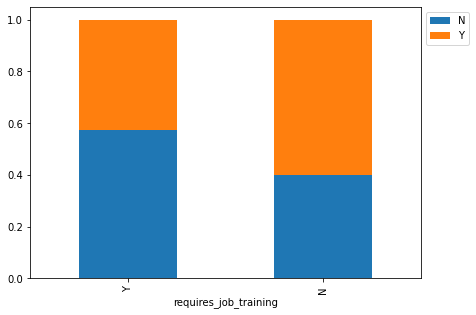

In [ ]:
stacked_barplot(ds, "requires_job_training", "has_job_experience")

These numbers are interesting because I think I might have expected a higher percentage of the number of people with no experience to require job training. Perhaps this speaks to the level of skill required for the job or perhaps the level of education the applicant brings with them. 

**Job Training and Education**

requires_job_training      N     Y    All
education_of_employee                    
All                    22525  2955  25480
Bachelor's              8971  1263  10234
Master's                8786   848   9634
High School             2990   430   3420
Doctorate               1778   414   2192
------------------------------------------------------------------------------------------------------------------------


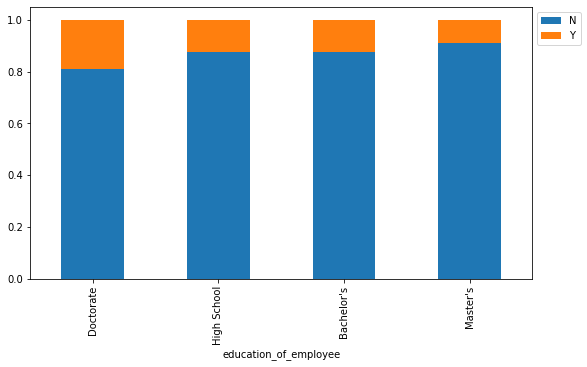

In [ ]:
stacked_barplot(ds, "education_of_employee", "requires_job_training")

Interestingly enough here, we find that those with a doctorate require the most job training. Those with a High School level education and those with a Bachelor's level seem to be about even while those with a Master's are the most job ready.

**Work Experience and Education**

has_job_experience         N      Y    All
education_of_employee                     
All                    10678  14802  25480
Bachelor's              4348   5886  10234
Master's                3993   5641   9634
High School             1396   2024   3420
Doctorate                941   1251   2192
------------------------------------------------------------------------------------------------------------------------


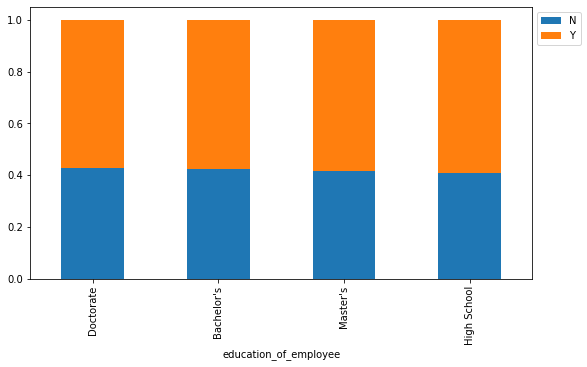

In [ ]:
stacked_barplot(ds, "education_of_employee", "has_job_experience")

The consistent relationship here is noteworthy. All four categories of education have roughly the same level of experience at about 58%.

**Prevailing Wage and Regions**

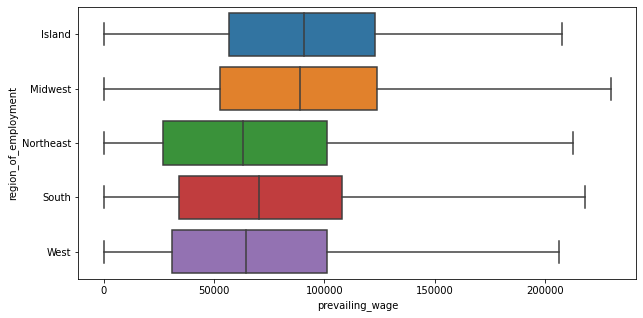

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=ds,x='prevailing_wage',y='region_of_employment',showfliers=False)
plt.show()

The Midwest is willing to pay the most which also speaks to demand for talent that we have explored in other graphs. The Northeast, South, and West are all roughly clumped together. Island is right about the same as Midwest but is somewhat devalued to the limited number of opportunities.

## Leading Questions
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

**1.Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?**

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


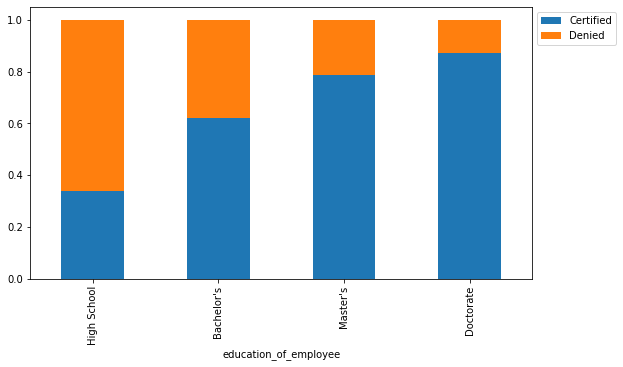

In [ ]:
stacked_barplot(ds, "education_of_employee", "case_status")

Clearly, the level of education plays heavily into Visa Certification. Those with only a high school education are certified less than 40% of the time while those with doctorate level education are certified almost 90% of the time with bachelors and masters level education showing consistent rises in certification percentage as well.

**2. How does the visa status vary across different continents?**

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


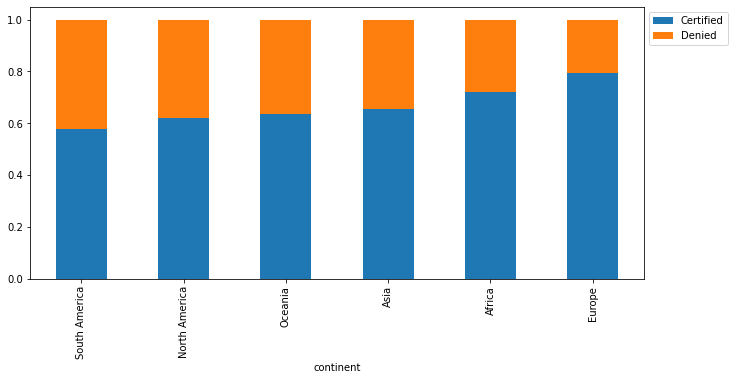

In [ ]:
stacked_barplot(ds, "continent", "case_status")

This data is interesting. Europe receives a 79% certification rate making it the continent with the highest rate. Africa receives a 72% certification rate despite have only 551 applications. North America, Oceania, and Asia (which has by far the most applicants) are all in roughly the same range in the 60% area with being the lowest South America at a mere 58%. Europe's number definitely seems high but the rest seem to be in a similar range for the most part.

**3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?**

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


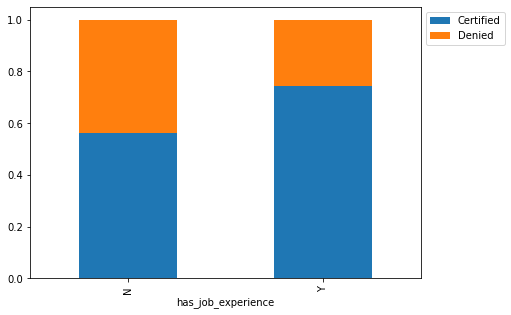

In [ ]:
stacked_barplot(ds, "has_job_experience", "case_status")

I would say there is a clear preference for job experience in the certification process as 74% of applicants with experience receive certification while only 56% without experience are certified.

**4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?**

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


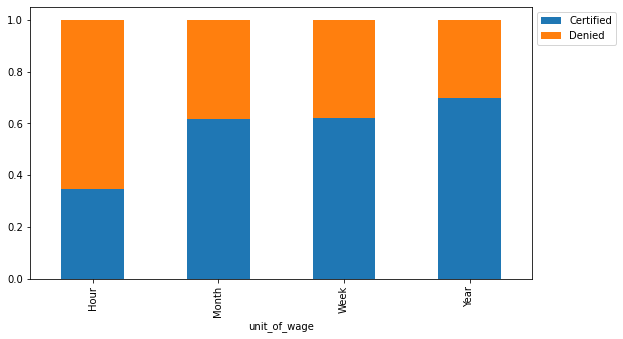

In [ ]:
stacked_barplot(ds, "unit_of_wage", "case_status")

Hourly wage earners are only certifed 34% of the time while in contrast to yearly which are certified 70% of the time. Monthly and weekly earners are both right around 60%. This makes sense when you consider that higher earning jobs in the US tend to measure salary by year while lower paying jobs that require less education are paid hourly. With that in mind, these numbers seem highly compatible with the numbers in question 1.

**5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?**

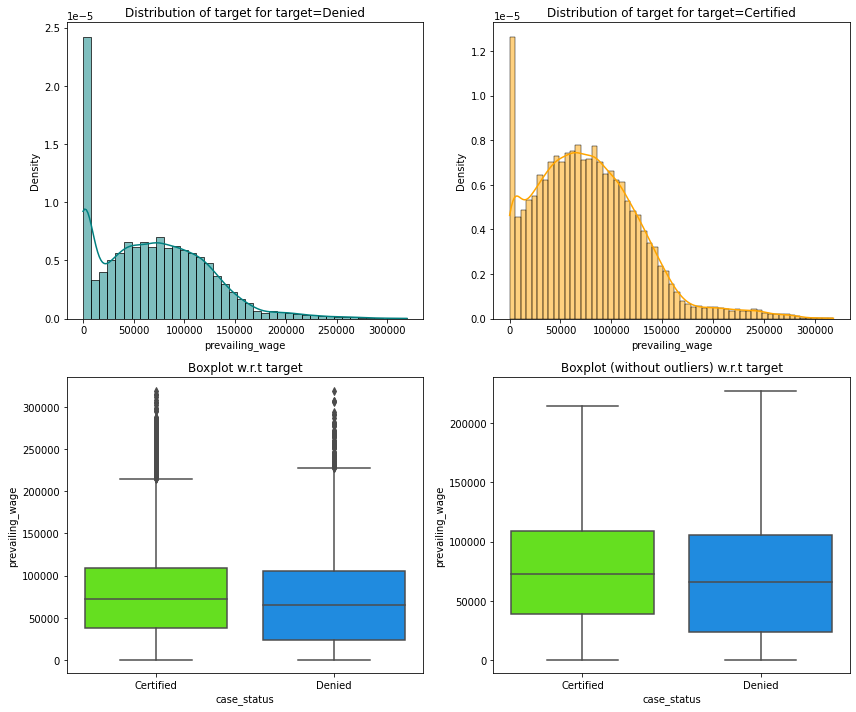

In [ ]:
distribution_plot_wrt_target(ds, "prevailing_wage", "case_status")

The Prevailing Wages are roughly the same between those who are certified and those who are not. There tend to be a great deal more outliers in the data for those who are certified but skew and the box plots are fairly similar.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [ ]:
# I like to create a copy before doing anything else so that original remains unchanged throughout the process
df = ds.copy()
df.head(5)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


Before going any further, I like to make an additional copy of the data and display the head. 

**Outlier Detection**

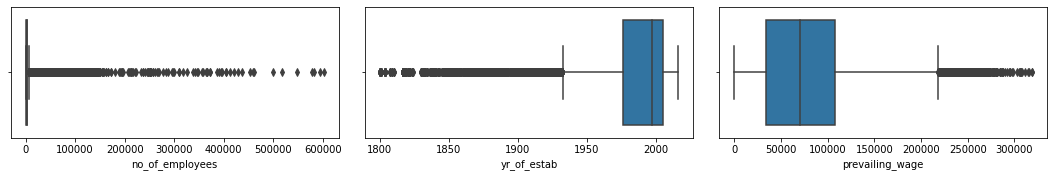

In [ ]:
#Code to detect outliers plot
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

As we have seen with our previous data analysis, the three categories above are prone to outliers but the data is legit.

## EDA

- It is a good idea to explore the data once again after manipulating it.

<Figure size 720x360 with 0 Axes>

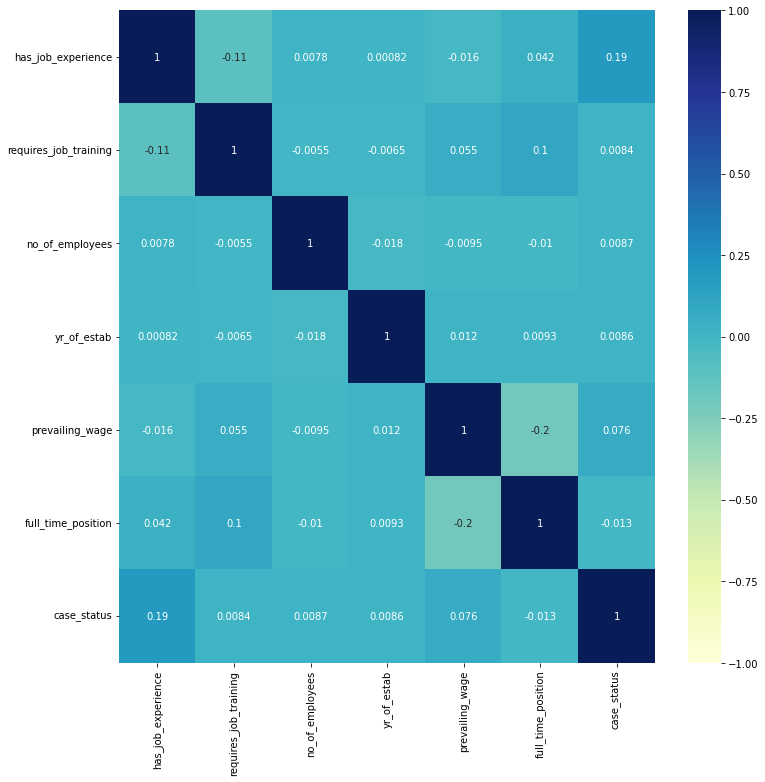

In [ ]:
plt.figure(figsize=(10,5))
ds_gconvert = ds
ds_gconvert = ds_gconvert.replace({'full_time_position': {'Y': 1, 'N': 0}})
ds_gconvert = ds_gconvert.replace({'requires_job_training': {'Y': 1, 'N': 0}})
ds_gconvert = ds_gconvert.replace({'has_job_experience': {'Y': 1, 'N': 0}})
ds_gconvert = ds_gconvert.replace({'case_status': {'Certified': 1, 'Denied': 0}})
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(data=ds_gconvert.corr(), annot=True,  cmap='YlGnBu',vmin=-1,vmax=1);

After EDA we see that the data is basically still the same and we are ready to begin making models.

## Building bagging and boosting models

**Spliting the Dataset**

In [ ]:
df["case_status"] = df["case_status"].apply(lambda x: 0 if x == "Denied" else 1)

#Separating features and the target column
X = df.drop("case_status", axis=1)
y = df["case_status"]

X = pd.get_dummies(X, drop_first=True)

#Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

X_train.shape, X_test.shape

((17836, 21), (7644, 21))

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


The data has been split into a 70:30 ratio for training(70) and testing (30). Class splits are similar in both sets.

### Model evaluation criterion

**Model can make wrong predictions as:**

Two things can happen if the model is incorrect-<br>
1. An applicant who should have been certified is not and the company loses out on an getting the most qualified candidate.<br>
2. An applicant who should not have been certifed is granted a visa and the company still loses out on the best candidate but has gone through the  bureaucratic hassle of getting a visa granted.

**Which case is more important?**

Since both of the above cases end in the same negative result, they must be weighed equally.

**Which metric satisfies our case?**

That said, the F1 Score can be used a the metric for evaluation of this model, as greater F1 scores minimize False Negatives and False Positives.<br>
We will use balanced class weights so that model focuses equally on both classes.

**Functions for modelling, performance metrics, and confusion matricies for different models**

In [ ]:

# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

###Model Building

**Decision Tree**

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.664835  0.742801   0.752232  0.747487


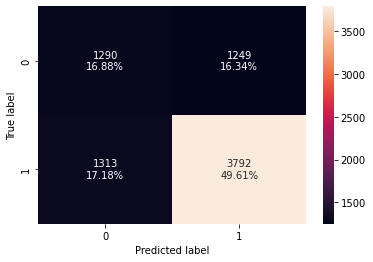

In [ ]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

The Decision tree is clearly overfitting the Training Data. Hopefully, when we get to the Hyperparameters section this can be addressed.

**Confusion Matrix Legend**

<br>**True Negative**(Top Left) - Predicts the visa will be denied and the visa is denied - 16.88%<br>**False Positive**(Top Right) - Predicts the visa will be certified and the visa is denied - 16.34%<br>**False Negative** (Bottom Left) - Predicts the visa will be denied and the visa is not denied - 17.18%<br>**True Positive**(Bottom Right) - Predicts the visa will be certified and the visa is certified - 49.61%

**Bagging Model-**
**<br>Random Forest Classifier**

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.720827  0.832125   0.768869  0.799247


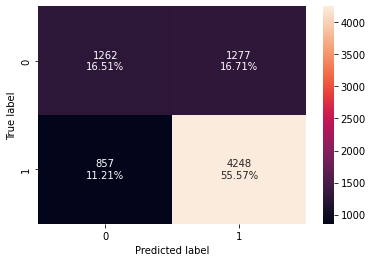

In [ ]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

F1 score on the Testing Data is slightly higher here but we are still seeing a lot of overfitting on the Training Data. Once again, we will wait and see what Hyperparameter Tuning does later on in the presentation.

**Confusion Matrix Legend**

<br>**True Negative**(Top Left) - Predicts the visa will be denied and the visa is denied - 16.51%<br>
**False Positive**(Top Right) - Predicts the visa will be certified and the visa is denied - 16.71%<br>
**False Negative** (Bottom Left) - Predicts the visa will be denied and the visa is not denied - 11.21%<br>
**True Positive**(Bottom Right) - Predicts the visa will be certified and the visa is certified - 55.57%

**Bagging Model-<br>Bagging Classifier**

Training performance:
    Accuracy    Recall  Precision        F1
0  0.985198  0.985982    0.99181  0.988887
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.691523  0.764153   0.771711  0.767913


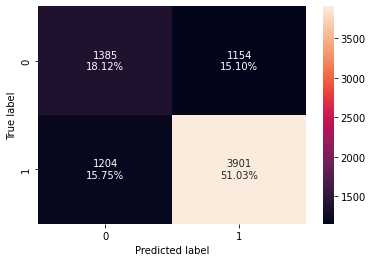

In [ ]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print("Training performance:\n" ,bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print("Testing performance:\n",bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

F1 Score here on the Testing Data is not quite as good as it was on the Random Forest and the Training Data is still overfitting.

**Confusion Matrix Legend**

<br>**True Negative**(Top Left) - Predicts the visa will be denied and the visa is denied - 18.12%<br>
**False Positive**(Top Right) - Predicts the visa will be certified and the visa is denied - 15.10%<br>
**False Negative** (Bottom Left) - Predicts the visa will be denied and the visa is not denied - 15.75%<br>
**True Positive**(Bottom Right) - Predicts the visa will be certified and the visa is certified - 51.03%

**Boosting Model-<br>AdaBoost Classifier**

   Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908
   Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481


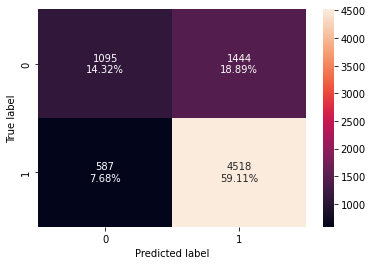

In [ ]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

**Confusion Matrix Legend**

<br>**True Negative**(Top Left) - Predicts the visa will be denied and the visa is denied - 14.32%<br>
**False Positive**(Top Right) - Predicts the visa will be certified and the visa is denied - 18.89%<br>
**False Negative** (Bottom Left) - Predicts the visa will be denied and the visa is not denied - 7.68%<br>
**True Positive**(Bottom Right) - Predicts the visa will be certified and the visa is certified - 59.11%

AdaBoost is generating a much better F1 score and appears to be avoiding the overfit we were seeing with previous models.

**Boosting Model-<br>Gradient Boosting Classifier**

Training performance:
    Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927


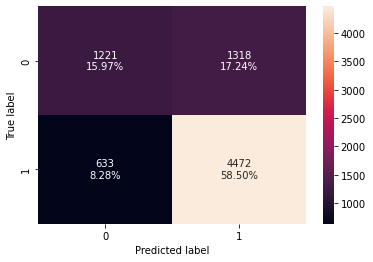

In [ ]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

Gradient Boosting is slightly outperforming AdaBoost on the F1 score for both Training and Testing Data. Will be curious to see how much more performance we can get out of both in the Hyperparameter Tuning stage.

**Confusion Matrix Legend**

<br>**True Negative**(Top Left) - Predicts the visa will be denied and the visa is denied - 15.97%<br>
**False Positive**(Top Right) - Predicts the visa will be certified and the visa is denied - 17.24%<br>
**False Negative** (Bottom Left) - Predicts the visa will be denied and the visa is not denied - 8.28%<br>
**True Positive**(Bottom Right) - Predicts the visa will be certified and the visa is certified - 58.50%

**Boosting Model-<br>XGBoost Classifier**

Training performance:
    Accuracy    Recall  Precision        F1
0  0.756279  0.883573   0.780513  0.828852
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744636  0.877375   0.771576  0.821082


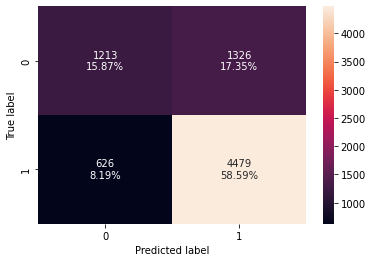

In [ ]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

Interestingly enough, the Gradient model appears to be outperforming XGBoost without tuning.

**Confusion Matrix Legend**

<br>**True Negative**(Top Left) - Predicts the visa will be denied and the visa is denied - 15.87%<br>
**False Positive**(Top Right) - Predicts the visa will be certified and the visa is denied - 17.35%<br>
**False Negative** (Bottom Left) - Predicts the visa will be denied and the visa is not denied - 8.19%<br>
**True Positive**(Bottom Right) - Predicts the visa will be certified and the visa is certified - 58.59%

##  Will tuning the hyperparameters improve the model performance?

**Decision Tree Hyperparameter Tuning**

In [ ]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.668,1:0.332},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.668, 1: 0.332}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.0001,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.712548  0.931923   0.720067  0.812411
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.706567  0.930852   0.715447  0.809058


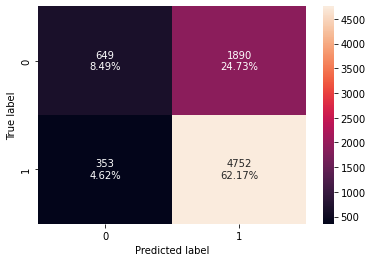

In [ ]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)


We can see here that the overfit issue from the original model has been solved but the F1 score on the Testing data still isn't as good as it is on some of the boosted models.

**Confusion Matrix Legend**

<br>**True Negative**(Top Left) - Predicts the visa will be denied and the visa is denied - 8.49%<br>
**False Positive**(Top Right) - Predicts the visa will be certified and the visa is denied - 24.73%<br>
**False Negative** (Bottom Left) - Predicts the visa will be denied and the visa is not denied - 4.62%<br>
**True Positive**(Bottom Right) - Predicts the visa will be certified and the visa is certified - 62.17%

**Random Forest Classifier Hyperparameter Tuning**

In [ ]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.668,1:0.332},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(10,30,10)) + [None],
                'max_features': ['sqrt',None],
                'min_samples_leaf': np.arange(5,15,5),
                'min_samples_split': np.arange(5, 20, 5),
                'n_estimators': np.arange(20,120,40)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.668, 1: 0.332}, max_features=None,
                       min_samples_leaf=5, min_samples_split=5, oob_score=True,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.889269  0.894317   0.937027  0.915174
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.719257  0.79001     0.7897  0.789855


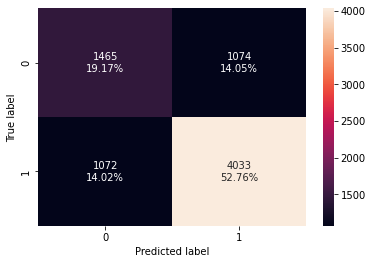

In [ ]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

The overfit issue has once again been decreased but we are not seeing as high a rise in the F1 score as we did in the Decision Tree.

**Confusion Matrix Legend**

<br>**True Negative**(Top Left) - Predicts the visa will be denied and the visa is denied - 19.17%<br>
**False Positive**(Top Right) - Predicts the visa will be certified and the visa is denied - 14.05%<br>
**False Negative** (Bottom Left) - Predicts the visa will be denied and the visa is not denied - 14.02%<br>
**True Positive**(Bottom Right) - Predicts the visa will be certified and the visa is certified - 52.76%

**Bagging Classifier Hyperparameter Tuning**

In [ ]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.8, max_samples=0.7, n_estimators=50,
                  random_state=1)

   Accuracy    Recall  Precision       F1
0  0.992824  0.998825    0.99051  0.99465
   Accuracy    Recall  Precision        F1
0  0.730508  0.869931   0.760836  0.811735


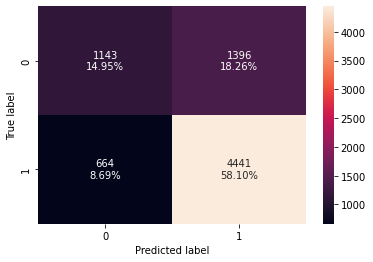

In [ ]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

The Training data here is still overfitting pretty badly and the F1 score's rise is not as good as we may have hope for.

**Confusion Matrix Legend**

<br>**True Negative**(Top Left) - Predicts the visa will be denied and the visa is denied - 14.95%<br>
**False Positive**(Top Right) - Predicts the visa will be certified and the visa is denied - 18.26%<br>
**False Negative** (Bottom Left) - Predicts the visa will be denied and the visa is not denied - 8.69%<br>
**True Positive**(Bottom Right) - Predicts the visa will be certified and the visa is certified - 58.10%

**AdaBoost Classifier Hyperparameter Tuning**

In [ ]:

# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),
                      DecisionTreeClassifier(max_depth=2)],
    "n_estimators": np.arange(20,120,40),
    "learning_rate":np.arange(0.2,2,0.6)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.2, n_estimators=60, random_state=1)

   Accuracy    Recall  Precision        F1
0  0.750168  0.878284   0.776821  0.824443
   Accuracy    Recall  Precision        F1
0  0.737964  0.870911   0.767876  0.816154


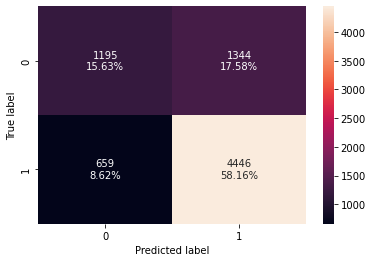

In [ ]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

Overfit issues were minimal here and we are still seeing roughly the same F1 score on the Testing data.

**Confusion Matrix Legend**

<br>**True Negative**(Top Left) - Predicts the visa will be denied and the visa is denied - 15.63%<br>
**False Positive**(Top Right) - Predicts the visa will be certified and the visa is denied - 17.58%<br>
**False Negative** (Bottom Left) - Predicts the visa will be denied and the visa is not denied - 8.62%<br>
**True Positive**(Bottom Right) - Predicts the visa will be certified and the visa is certified - 58.16%

**Gradient Boosting Classifier Hyperparameter Tuning**

In [ ]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,175,250],
    "subsample":[0.8,1],
    "max_features":[0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, random_state=1, subsample=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.758522  0.880383   0.784443  0.829648
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.74529  0.873262   0.774227  0.820768


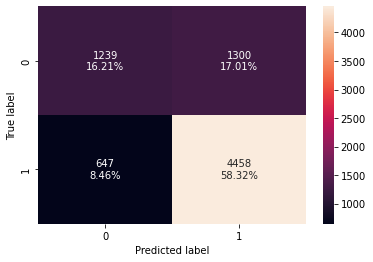

In [ ]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

Same as above. Overfit issues were not much of an issue but the F1 score is up over 82% which is the best result yet.

**Confusion Matrix Legend**

<br>**True Negative**(Top Left) - Predicts the visa will be denied and the visa is denied - 16.21%<br>
**False Positive**(Top Right) - Predicts the visa will be certified and the visa is denied - 17.01%<br>
**False Negative** (Bottom Left) - Predicts the visa will be denied and the visa is not denied - 8.46%<br>
**True Positive**(Bottom Right) - Predicts the visa will be certified and the visa is certified - 58.32%

**XGBoost Classifier Hyperparameter Tuning**

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.7, eval_metric='logloss', n_estimators=50,
              random_state=1, subsample=0.7)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.74843  0.892386   0.768358  0.825741
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.740319  0.88952   0.761657  0.820638


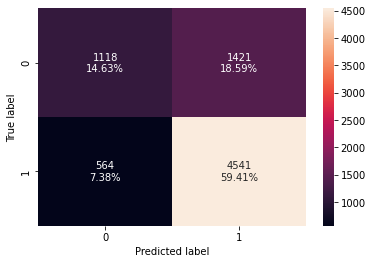

In [ ]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

Results here are not quite as good as above in the Gradient Boost model but still very promising.

**Confusion Matrix Legend**

<br>**True Negative**(Top Left) - Predicts the visa will be denied and the visa is denied - 14.63%<br>
**False Positive**(Top Right) - Predicts the visa will be certified and the visa is denied - 18.59%<br>
**False Negative** (Bottom Left) - Predicts the visa will be denied and the visa is not denied - 7.38%<br>
**True Positive**(Bottom Right) - Predicts the visa will be certified and the visa is certified - 59.41%

**Stacking Classifier**

In [ ]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.668,
                                                                     1: 0.332},
                                                       max_features=None,
                                                       min_samples_leaf=5,
                                                       min_samples_split=5,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Decision Tr

Training performance:
    Accuracy    Recall  Precision       F1
0  0.789807  0.898262   0.808355  0.85094
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744767  0.869148   0.775699  0.819769


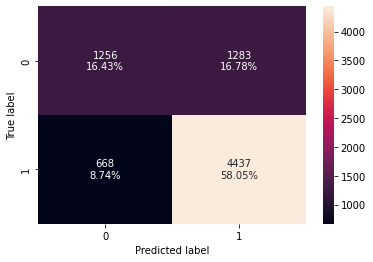

In [ ]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

Training performance here is the best without obvious signs of an overfit but the Testing data lags behind the other two boosted models above.

**Confusion Matrix Legend**

<br>**True Negative**(Top Left) - Predicts the visa will be denied and the visa is denied - 16.43%<br>
**False Positive**(Top Right) - Predicts the visa will be certified and the visa is denied - 16.78%<br>
**False Negative** (Bottom Left) - Predicts the visa will be denied and the visa is not denied - 8.74%<br>
**True Positive**(Bottom Right) - Predicts the visa will be certified and the visa is certified - 58.05%

## Model Performance Comparison and Conclusions

In [ ]:
#training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df
# testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]

Training performance comparison:


In [ ]:
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664835,0.706567,0.720827,0.719257,0.691523,0.730508,0.734301,0.737964,0.744767,0.745290,0.744636,0.740319,0.744767
Recall,0.742801,0.930852,0.832125,0.790010,0.764153,0.869931,0.885015,0.870911,0.876004,0.873262,0.877375,0.889520,0.869148
Precision,0.752232,0.715447,0.768869,0.789700,0.771711,0.760836,0.757799,0.767876,0.772366,0.774227,0.771576,0.761657,0.775699
F1,0.747487,0.809058,0.799247,0.789855,0.767913,0.811735,0.816481,0.816154,0.820927,0.820768,0.821082,0.820638,0.819769


Tuning had very little effect on the F1 score Testing data. It did solve some of the overfit issues with the F1 Scores on the Decision Tree and Random Forest training data but actually made the Bagging Classifier F1 score overfit worse. Boosting data was largely unchanged by tuning and doesn't appear to have had much of the overfit issues we saw in earlier models on the list. It looks like our best model for this data is the untuned Gradient Classifier with and F1 score of 83% on Training and 82% on the Test data.

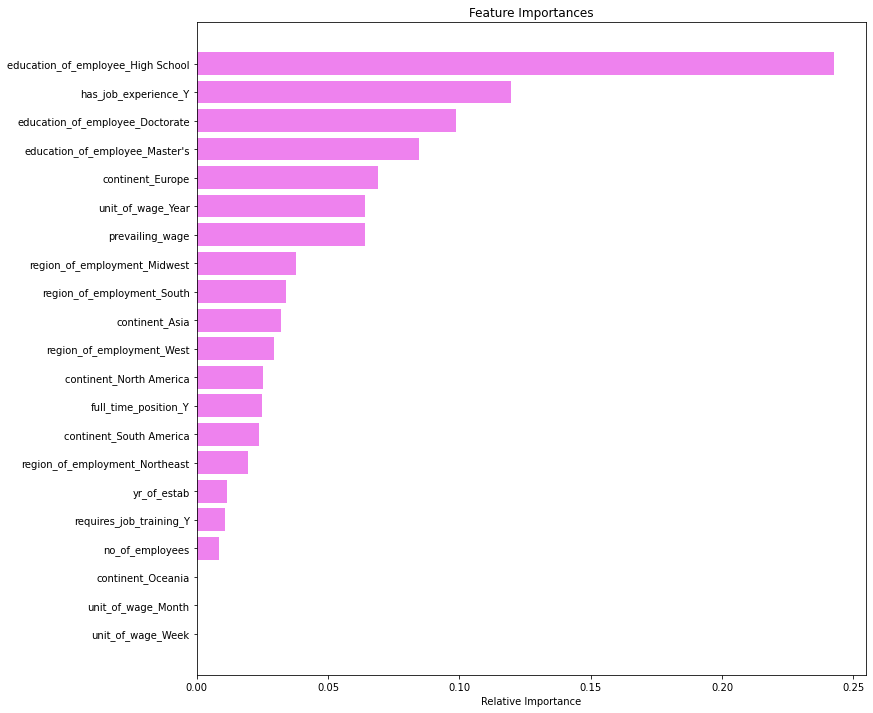

In [ ]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Education and Job experience are the obvious standouts here. Originating from Europe, Yearly wage and Prevailing wage also carry a fair amount of importance when weighing whether or not a visa will be certified. A lot of this makes sense as level of education and experience speak to how qualified an applicant is to do the job and Yearly wages are generally how skilled labor and white collar workers are paid.

## Actionable Insights and Recommendations

**To ensure a higher level of Visa certification, the Office of Foreign Labor Certification (OFLC) should focus on candidates who are-**<br><br>
* **Well educated**<br>
  We saw in the data that the higher level of education an applicant had achieved, the greater their chances of having their visa certified became.<br><br>
* **Have experience in the profession being applied for or something similar enough to be compatible**<br>
  Experienced professionals held a distinct numerical advantage over inexperienced workers in receiving their visas.<br><br>
* **Candidates whose salary expectations fall into line with the regional prevailing wage**<br>
  Workers with realistic salary expectations in a given field had higher chance of getting their visas certifed. Having such expectations could also speak to level of experience in a given field.<br><br>

* **Come from highly skilled or white collar positions that tend to measure compensation per anum.** <br>Typically, if a company is willing to go through the process of bringing someone in to fill a position from outside the country, it is because they possess a certain set and level of skills that are unavailable or difficult to obtain natively. Positions requiring that level of skill typically measure salary in yearly increments. Again, it all comes back to experience, education, and skill.